#PCA

Here is the best intuitive explanation of how PCA works:  https://www.youtube.com/watch?v=BfTMmoDFXyE

The following code is adopted from this blog: http://sebastianraschka.com/Articles/2014_pca_step_by_step.html  with the author's permission

## Create a matrix of samples

In [1]:
##  We are going to create two 3D samples from multivariate centered normal distribution. We can interpret these as anything, 
##  from bacterial assays to wind speed distribution in the air to fish migration patterns to (volume, price, revenue) tuples.

##  Our ultimate goal is to find which two of these three dimensions are carrying the most information about the data variance.

import numpy as np

np.random.seed(1) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix  shape is not (3, 20)"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class1_sample.shape == (3,20), "The matrix  shape is not (3, 20)"
print "Created two random 3D samples"


Created two random 3D samples


Plot the samples in a 3D scatter plot.

Populating the interactive namespace from numpy and matplotlib


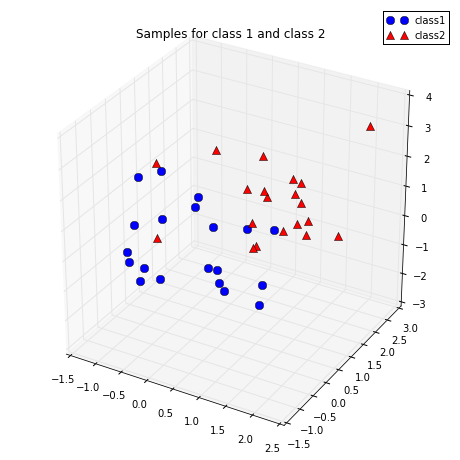

In [3]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 
        'o', markersize=8, color='blue', label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], 
        '^', markersize=8, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

Because we don't need class labels for the PCA analysis, let us merge the samples for our 2 classes into one 3×40-dimensional array.

In [4]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix shape is not (3, 40)"

Means of the all_samples matrix:

## Build the means and the scatter and covariance matrices

In [5]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print 'Mean Vector:\n', mean_vector

Mean Vector:
[[ 0.41667492]
 [ 0.69848315]
 [ 0.49242335]]


Scatter Matrix of the all_samples matrix:
$m = \frac{1}{n}\sum_k(x_k)$

$S = \sum_k{(x_k - m) * (x_k - m)^T}$

In [7]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot(
        (all_samples[:,i].reshape(3,1) - mean_vector).T)
print 'Scatter Matrix:\n', scatter_matrix

Scatter Matrix:
[[ 38.4878051   10.50787213  11.13746016]
 [ 10.50787213  36.23651274  11.96598642]
 [ 11.13746016  11.96598642  49.73596619]]


Covariance matrix:

In [8]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print 'Covariance Matrix:\n', cov_mat

Covariance Matrix:
[[ 0.9868668   0.26943262  0.2855759 ]
 [ 0.26943262  0.92914135  0.30682016]
 [ 0.2855759   0.30682016  1.27528118]]


Alternatively, we could have used **pandas** (the code is much cleaner):

In [9]:
import pandas as pd

all_samples_df = pd.DataFrame (all_samples.T) ##(the transposition is to organize the data in 3 columns, not 3 rows)
all_samples_df.cov()

,0,1,2
0,0.986867,0.269433,0.285576
1,0.269433,0.929141,0.306820
2,0.285576,0.306820,1.275281


##Computing eigenvectors and corresponding eigenvalues

To show that the eigenvectors are indeed identical whether we derived them from the scatter or the covariance matrix, let us put an assert statement into the code. Also, we will see that the eigenvalues were indeed scaled by the factor 39 when we derived it from the scatter matrix.

In [10]:
# eigenvectors and eigenvalues from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'
    
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.49210223]
 [-0.47927902]
 [-0.72672348]]
Eigenvalue 1 from scatter matrix: 65.1693677908
Eigenvalue 1 from covariance matrix: 1.67100943053
('Scaling factor: ', 39.000000000000014)
----------------------------------------
Eigenvector 2: 
[[-0.64670286]
 [-0.35756937]
 [ 0.67373552]]
Eigenvalue 2 from scatter matrix: 32.6947129632
Eigenvalue 2 from covariance matrix: 0.838325973416
('Scaling factor: ', 38.999999999999972)
----------------------------------------
Eigenvector 3: 
[[ 0.58276136]
 [-0.8015209 ]
 [ 0.13399043]]
Eigenvalue 3 from scatter matrix: 26.5962032821
Eigenvalue 3 from covariance matrix: 0.68195393031
('Scaling factor: ', 39.000000000000028)
----------------------------------------


###Visualizing the eigenvectors
Before we move on to the next step, let us plot the eigenvectors centered at the sample mean.

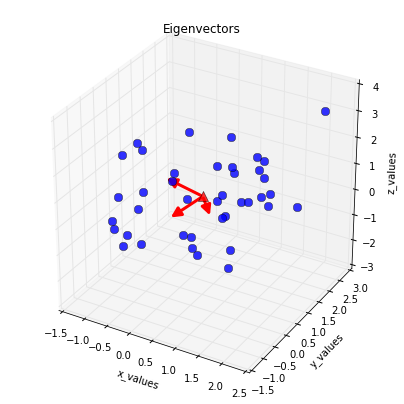

In [9]:
%matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 
        'o', markersize=8, color='blue', alpha=0.8)
ax.plot([mean_x], [mean_y], [mean_z], 
        '^', markersize=10, color='red', alpha=0.8)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]+mean_x], 
                [mean_y, v[1]+mean_y], 
                [mean_z, v[2]+mean_z], 
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")

    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

## Which eigenvectors to drop?

All our eigenvectors have length $\approx1$:



In [11]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

Eigenvalue can be viewed as a measure of how much variance there is along the line of its corresponding eigenvector.

Let us sort them in the decreasing order of eigenvalue.

In [13]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) 
             for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted in decreasing order by the eigenvalues
for eig in eig_pairs:
    print(eig[0])

65.1693677908
32.6947129632
26.5962032821


##Finally:

Get the conversion matrix - by taking the first $k$ elements of the eig_pairs list - and apply it


In [14]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), 
                      eig_pairs[1][1].reshape(3,1)))
print 'Matrix W:\n', matrix_w

Matrix W:
[[-0.49210223 -0.64670286]
 [-0.47927902 -0.35756937]
 [-0.72672348  0.67373552]]


In [13]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix shape is not (2,40)."

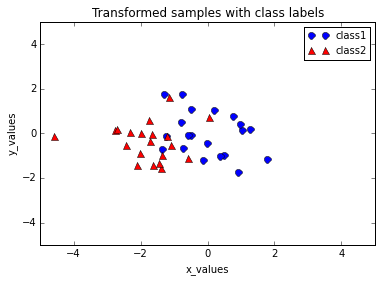

In [14]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 
         'o', markersize=7, color='blue', label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], 
         '^', markersize=7, color='red', label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

## All of the above outlines what I had to do to code PCA in C++ 12 years ago >:-\
(except that all the matrix algebra had to be coded beforehand).

##Today, the same thing with the $PCA$ class of the $matplotlib.mlab$ library can be a one-liner ($DANGER:$ You have to do your own scaling):

PC axes in terms of the measurement axes scaled by the standard deviations:
[[-0.57087338 -0.58973911 -0.5712367 ]
 [-0.71046744  0.006114    0.70370352]
 [ 0.41150894 -0.80757068  0.42248075]]


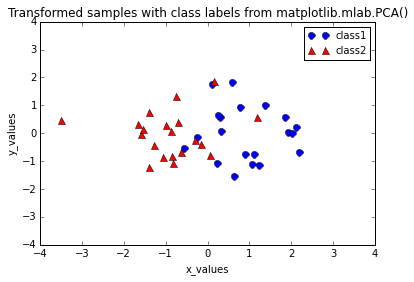

In [16]:
from matplotlib.mlab import PCA as mlabPCA
mlab_pca = mlabPCA(all_samples.T) ## You have to pass it with columns corresponding to the initial components

print 'PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt 

###  The rest is graphics:
plt.plot(mlab_pca.Y[0:20,0],mlab_pca.Y[0:20,1], 
         'o', markersize=7, color='blue', label='class1')
plt.plot(mlab_pca.Y[20:40,0], mlab_pca.Y[20:40,1], 
         '^', markersize=7, color='red', label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

## And with the $PCA$ class of the $sklearn.decomposition$ library, it is a 2-liner:

In [23]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

Just like in Project 2, we are using the **fit_transform()** function.  The **transform** part of it will project the data onto the principal-component (hyper)plane.

Let's explore what we have got with these two dimensions out of three (explanation of the math is here:https://inst.eecs.berkeley.edu/~ee127a/book/login/l_sym_pca.html):

In [24]:

print "Components:\n", sklearn_pca.components_
print 40*'*'
print ""
print "Explained Variance:\n", sklearn_pca.explained_variance_

print 40*'*'
print "Total Explained Variance: \n", sum (sklearn_pca.explained_variance_)

##  The diagonal of the covariance matrix is the home of the eigenvalues.  
##  Their sum (trace of the covariance matrix) is the total variance.
total_variance = cov_mat.trace()
print "Total Variance:\n", total_variance
print "Pct. explained variance:\n", 100.0 * sum(sklearn_pca.explained_variance_) / total_variance

print 40*'*'
print ""
print "Pct. Explained variance (RSq) by each primary component (eigenvalues):\n", 100.0 * sklearn_pca.explained_variance_ratio_
print "Sum of Pct. Explained variances by components:\n", 100.0 * sum(sklearn_pca.explained_variance_ratio_)


Components:
[[-0.49210223 -0.47927902 -0.72672348]
 [ 0.64670286  0.35756937 -0.67373552]]
****************************************

Explained Variance:
[ 1.62923419  0.81736782]
****************************************
Total Explained Variance: 
2.44660201885
Total Variance:
3.19128933426
Pct. explained variance:
76.66500159
****************************************

Pct. Explained variance (RSq) by each primary component (eigenvalues):
[ 52.36157727  26.2691936 ]
Sum of Pct. Explained variances by components:
78.6307708615


Note that the sum of eigenvalues (explained variance ratios) is greater than the sum of total explained variances divided by the total variance. In your work, use the sum of explained variance ratios instead of total explained variance divided by total variance. 

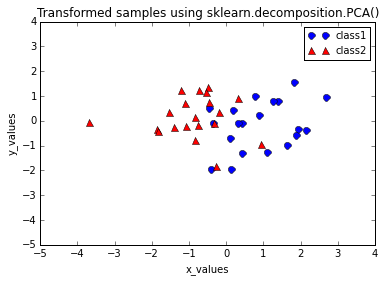

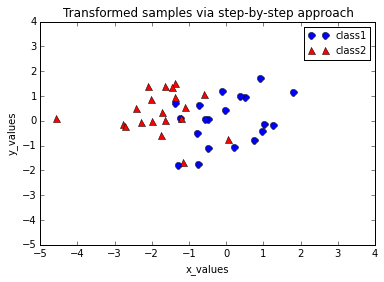

In [24]:
#####  The rest is graphics:
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 
         'o', markersize=7, color='blue', alpha=1.0, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], 
         '^', markersize=7, color='red', alpha=1.0, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-5,4])
plt.ylim([-5,4])
plt.legend()
plt.title('Transformed samples using sklearn.decomposition.PCA()')
plt.show()


#### Compare with step-by-step approach
transformed[1] = transformed[1]*(-1) # invert the PC2 axis

plt.plot(transformed[0,0:20], transformed[1,0:20], 
         'o', markersize=7, color='blue', alpha=1.0, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], 
         '^', markersize=7, color='red', alpha=1.0, label='class2')
plt.xlim([-5,4])
plt.ylim([-5,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples via step-by-step approach')
plt.show()

## More to explore
Canonical Correlation Analysis:  (example in R):  http://www.ats.ucla.edu/stat/r/dae/canonical.htm

Math:  http://www.cs.columbia.edu/~stratos/research/pca_cca.pdf